# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [3]:
# Cargar el archivo CSV
df = pd.read_csv("../data.csv")


In [4]:
# Crear variable binaria de adicción (1 = alto, 0 = bajo)
df["AddiccionBinaria"] = (df["Addiction_Level"] > 5).astype(int)

# 3. Variables predictoras y objetivo
X = df[["Daily_Usage_Hours"]]     # Horas de uso
y = df["AddiccionBinaria"]        # Etiqueta

# 4. Separar datos entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Predicciones
y_pred = model.predict(X_test)

# 7. Resultados
print("MATRIZ DE CONFUSIÓN")
print(confusion_matrix(y_test, y_pred))




MATRIZ DE CONFUSIÓN
[[  3  25]
 [  8 864]]


In [5]:
print("\nREPORTE DE CLASIFICACIÓN")
print(classification_report(y_test, y_pred))




REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

           0       0.27      0.11      0.15        28
           1       0.97      0.99      0.98       872

    accuracy                           0.96       900
   macro avg       0.62      0.55      0.57       900
weighted avg       0.95      0.96      0.96       900



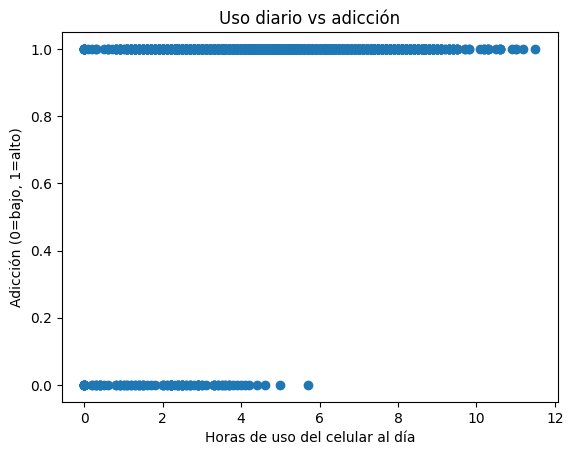

In [9]:

# 8. Grafico simple
plt.scatter(df["Daily_Usage_Hours"], df["AddiccionBinaria"])
plt.xlabel("Horas de uso del celular al día")
plt.ylabel("Adicción (0=bajo, 1=alto)")
plt.title("Uso diario vs adicción")
plt.show()

In [6]:
y_prob = model.predict_proba(X_test)[:, 1]
df_pred = pd.DataFrame({"Horas": X_test["Daily_Usage_Hours"], "Probabilidad": y_prob})
print(df_pred.head())


      Horas  Probabilidad
1801    5.6      0.996424
1190    5.1      0.993852
1817    8.0      0.999737
251     3.0      0.942619
2505    4.5      0.988251


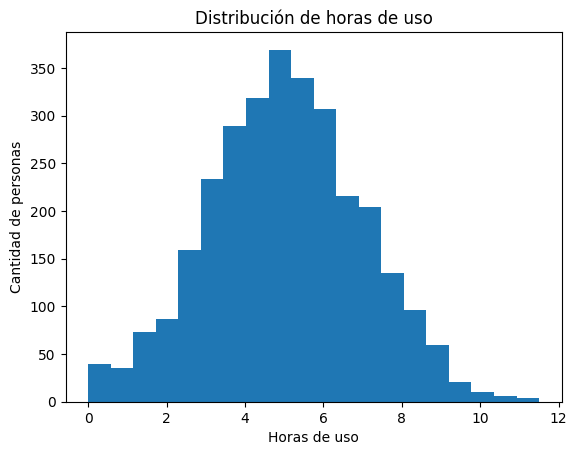

In [11]:
plt.hist(df["Daily_Usage_Hours"], bins=20)
plt.xlabel("Horas de uso")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de horas de uso")
plt.show()

